In [3]:
import numpy as np

import proper
proper.use_ffti = False
proper.use_fftw = False
import roman_phasec_proper
roman_phasec_proper.copy_here()
import ray # for multiprocesing
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
reload(cgi)

from cgi_phasec_poppy.imshows import *

iwa = 6
owa = 20

# Test monochromatic PSFs.

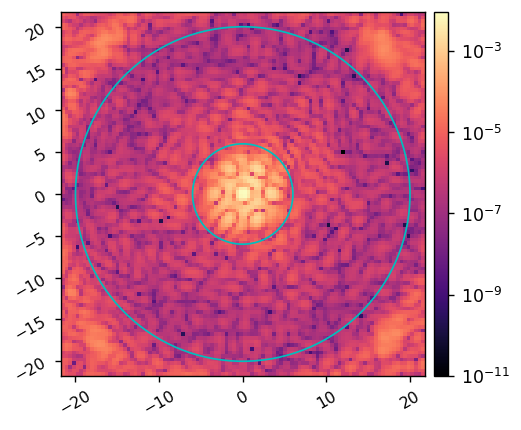

In [4]:
reload(cgi)
reload(cgi.proper_cgi)

mode = cgi.proper_cgi.PROPERCGI(cgi_mode='spc-wide_band1', npsf=100,
                                use_pupil_defocus=True, use_opds=True)

mode.use_fpm = False
unocc_psf = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(unocc_psf, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches, vmin=1e-11)

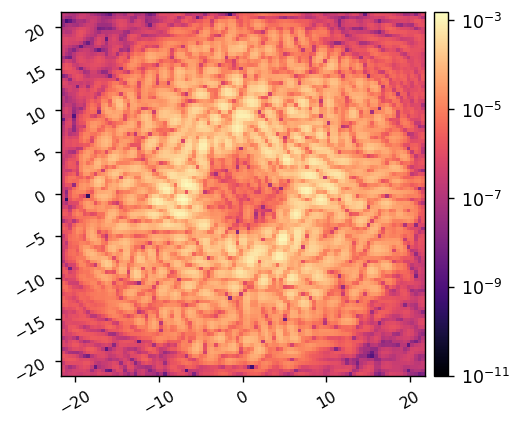

In [6]:
mode.use_fpm = True
mode.norm = unocc_psf.max()

image = mode.snap()
imshow1(image, lognorm=True, pxscl=mode.psf_pixelscale_lamD, vmin=1e-11)

In [8]:
import scipy
poppy_im = scipy.ndimage.shift(np.rot90(np.rot90(fits.getdata('poppy_spc_wfov_band1_image.fits'))), (1,1))

In [14]:
reload(cgi.imshows)
from cgi_phasec_poppy.imshows import *

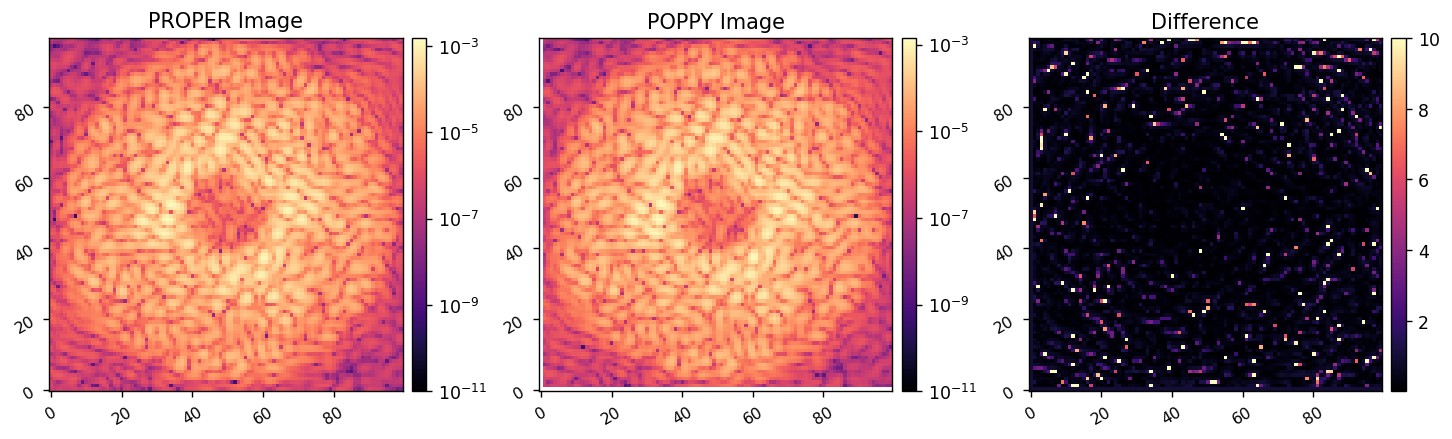

In [19]:
imshow3(image, poppy_im, abs(image-poppy_im)/image,
        'PROPER Image', 'POPPY Image', 'Difference', 
        lognorm1=True, lognorm2=True, 
        vmin1=1e-11, vmin2=1e-11, 
#         lognorm3=True,
#         vmax3=np.max(np.concatenate([image, poppy_im])),
        vmax3=10,
       )